In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8') 
# df_start.head()

In [2]:
#Error handling 
df_start['Date'].replace("12/05.2015","12/05/2015",inplace=True) 
df_start['Date'].replace("13/04.2015","13/04/2015",inplace=True) 
df_start['Date'].replace("15/01.2015","15/01/2015",inplace=True)
df_start['Date'].replace("22/01//2015","22/01/2015",inplace=True)
# df_start.head()

In [3]:
def convertDate(date): 
    return date.split('/')[-1] 

df_start['Year']=df_start['Date'].apply(convertDate) 

In [4]:
year_count=df_start['Year'].value_counts()
year_fund=list(zip(year_count.index,year_count.values))
year_fund=np.array(year_fund,dtype=int) 
year_fund=year_fund[year_fund[:,0].argsort()]
year=year_fund[:,0]
funding_round=year_fund[:,1] 

for i in range(len(year)):
    print(year[i],funding_round[i])

2015 936
2016 993
2017 443


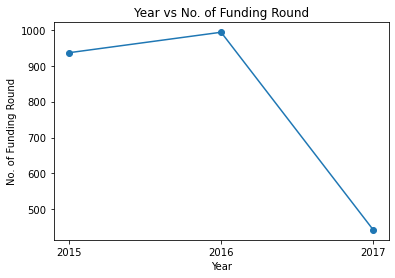

In [5]:
plt.plot(year,funding_round,marker = 'o') 
plt.xticks(year) 
plt.title('Year vs No. of Funding Round') 
plt.xlabel('Year')
plt.ylabel('No. of Funding Round')
plt.show() 

In [6]:
import pandas as pd
import numpy as np
path = "A1_question.csv"
data = pd.read_csv(path,encoding='utf-8')
df=data.copy()
df["CityLocation"].dropna(inplace=True)
def separateCity(s):
    s = str(s)
    return s.split("/")[0].strip()
df["CityLocation"] = df["CityLocation"].apply(separateCity)
df["CityLocation"].replace("Delhi", "New Delhi", inplace=True)
df["CityLocation"].replace("bangalore", "Bangalore", inplace=True)

s=df["CityLocation"].value_counts()[0:10]
cities = s.index
num_startups = s.values
for i in range(len(cities)):
    print(cities[i], num_startups[i])

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
nan 179
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv')
df = data.copy()
df.AmountInUSD.dropna(inplace=True)
df.CityLocation.dropna(inplace=True)

def seperateCity(s):
    s = str(s)
    return s.split('/')[0].strip()

df['CityLocation'] = df['CityLocation'].apply(seperateCity)
df['CityLocation'].replace( "Delhi","New Delhi",inplace=True)
df['CityLocation'].replace("bangalore","Bangalore",inplace=True)

funds = df['AmountInUSD']
city = df['CityLocation']


In [8]:
df["AmountInUSD"]=df["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
df["AmountInUSD"]=pd.to_numeric(df["AmountInUSD"])
city_amount=df.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending=False)[0:10]
city=city_amount.index
amountCity=city_amount.values
perAmount=np.true_divide(amountCity, amountCity.sum())*100
for i in range(len(city)):
    print(city[i],format(perAmount[i],'.2f'))
print(city_amount)

Bangalore 46.33
New Delhi 15.50
Mumbai 12.95
Gurgaon 11.38
nan 7.00
Chennai 2.26
Pune 2.02
Hyderabad 1.07
Noida 0.94
Ahmedabad 0.54
CityLocation
Bangalore    8.422974e+09
New Delhi    2.818248e+09
Mumbai       2.354934e+09
Gurgaon      2.069022e+09
nan          1.271864e+09
Chennai      4.111050e+08
Pune         3.666530e+08
Hyderabad    1.953620e+08
Noida        1.706380e+08
Ahmedabad    9.818600e+07
Name: AmountInUSD, dtype: float64
